# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# other imports if necessary
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.
3. Perform L1 and L2 regularization on the curve obtained from step 2.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



[0.92648114 0.12118123 0.33408391 0.43150125 0.82695717 0.98845427
 0.88229683 0.72259457 0.00813529 0.29328584 0.49674249 0.70825411
 0.75318668 0.72890199 0.39162196 0.72103761 0.62735225 0.08615469
 0.49034313 0.79847258 0.41526548 0.72090575 0.63310577 0.16800165
 0.08183554 0.15946561]


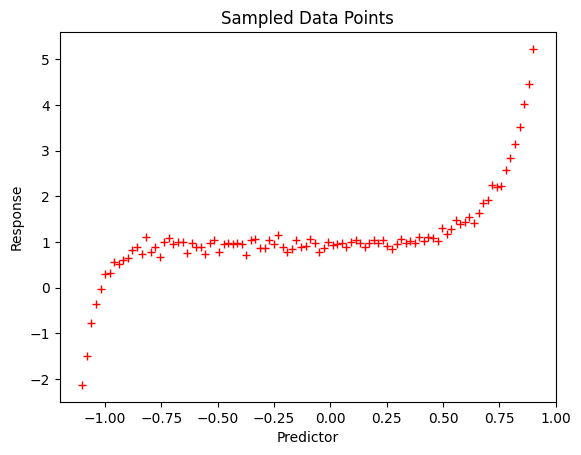

In [ ]:
def gen_data():
    coeff = np.random.rand(26)
    print(coeff)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y, coeff

predictor, response, gen_data_coeff= gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [ ]:
# your code here
# we'll need a cost function, gradient descent algo, pdf pg 77
def simpleRegression_coeff(x, y):
  n = len(x)
  x_bar, y_bar = np.sum(x)/n, np.sum(y)/n
  beta1,denom, beta2 = 0, 0, 0
  for xi,yi in zip(x, y):
    beta1 += (xi-x_bar)*(yi-y_bar)
    denom += ((xi-x_bar)**2)

  beta1 = beta1/denom
  beta2 = y_bar - beta1*x_bar
  return beta1, beta2

line_coeff = simpleRegression_coeff(predictor, response)
line = line_coeff[0]*predictor + line_coeff[1]

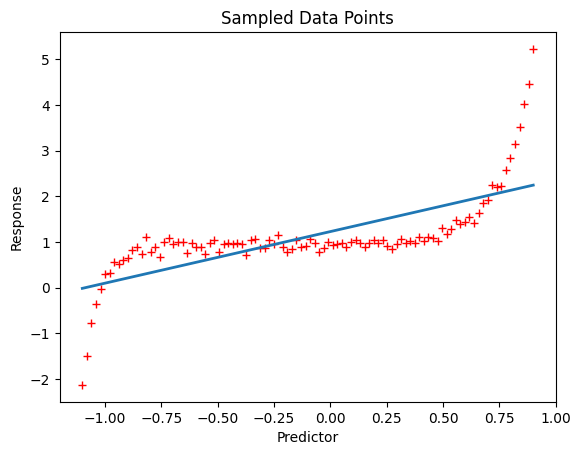

In [ ]:
#@title Plotting the line
plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.plot(predictor, line, label='Regression Line', linewidth=2)
plt.show()

In [ ]:
#@title Polynomial Regression Class
class PolynomialRegression:
    def __init__(self, degree, alpha=0.01, max_iter=1000):
        self.degree = degree
        self.alpha = alpha
        self.max_iter = max_iter
        self.score_mse = 0
        self.weights = [0] * (self.degree + 1)

    def l1_fit(self, X, y, lda=0.1):
      X, m = np.vander(X, self.degree + 1), len(X)
      for i in range(self.max_iter):
          # if i == 1: print(X, self.weights)
          y_pred = np.dot(X, self.weights)
          error = y_pred - y
          gradient = np.dot(X.T, error)
          # if i%100 == 0 and i != 0: print(f"at epoch: {i}, error (MSE) : {self.score(X, y)}")
          self.weights -= self.alpha * gradient * (1/m)
          self.weights -= lda * gradient * (1/m)

    def l2_fit(self, X, y, lda=0.1):
      X, m = np.vander(X, self.degree + 1), len(X)
      for i in range(self.max_iter):
          # if i == 1: print(X, self.weights)
          y_pred = np.dot(X, self.weights)
          error = y_pred - y
          gradient = np.dot(X.T, error)
          # if i%100 == 0 and i != 0: print(f"at epoch: {i}, error (MSE) : {self.score(X, y)}")
          self.weights -= self.alpha * gradient * (1/m)
          self.weights -= lda * (1/(2*m))

    def fit(self, X, y):
        X, m = np.vander(X, self.degree + 1), len(X)

        for i in range(self.max_iter):
            # if i == 1: print(X, self.weights)
            y_pred = np.dot(X, self.weights)
            error = y_pred - y
            gradient = np.dot(X.T, error)
            # if i%100 == 0 and i != 0: print(f"at epoch: {i}, error (MSE) : {self.score(X, y)}")
            self.weights -= self.alpha * gradient * (1/m)

    def predict(self, X):
        X = np.vander(X, self.degree + 1)
        return np.dot(X, self.weights)

    def score(self, X, y):
        y_pred = self.predict(X)
        error = y_pred - y
        self.score_mse = np.mean(error ** 2)
        return self.score_mse



In [ ]:
best_model = PolynomialRegression(2)
best_model.score(predictor, response)

for i in range(2, 26):

  model = PolynomialRegression(i)
  model.fit(predictor, response)
  model.score(predictor, response)
  # print(f"compared {model.score_mse, best_model.score_mse}")

  if(model.score_mse < best_model.score_mse):
    best_model = model

best_model.degree, best_model.score_mse

(19, 0.06781106117543154)

In [ ]:
coeff = np.poly1d(best_model.weights)
model = PolynomialRegression(25, alpha=0.001, max_iter=1000)
model.fit(predictor, response)
model.score(predictor, response)

0.5129412823185533

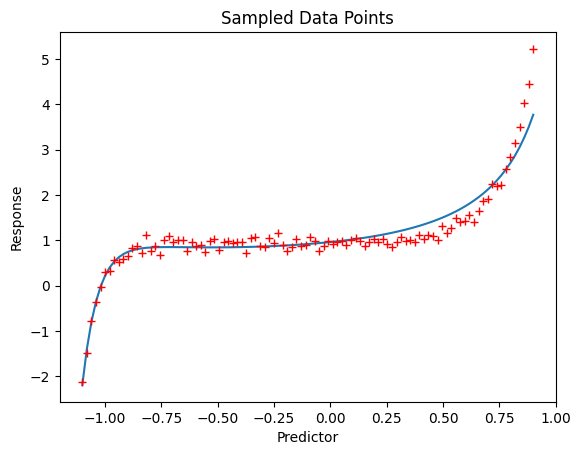

In [ ]:
#@title Plotting the  curve using coefficients obtained from best model
output = coeff(predictor)
plt.plot(predictor, output)
plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()



Clearly, there is overfitting, from observation, increasing the value of k results the best model everytime. (i.e, the highest value of k has the last mse due to overfitting). Lets continue with the value `k=19` and see what we can improve using L1 and L2 regularization.

### L1 regularization
The term involves `|w|`, taking its derivative only makes it a constant but we retain the 2 in the denominator since theres no derivative cancelling it out now.

### L2 regularization
The term involves `w^2` (omega square), minimizing the cost function now results in having to add another factor = `lambda*omega`, in our implementation we have taken `w` common.

In [ ]:
best_model_l1 = PolynomialRegression(19)
best_model_l1.score(predictor, response)
lamda_values = [0.001, 0.01, 0.1, 1]
best_lamda  = 0.001
for i in lamda_values:

  model = PolynomialRegression(19)
  model.l1_fit(predictor, response, i)
  model.score(predictor, response)
  if(model.score_mse < best_model_l1.score_mse):
    best_model_l1 = model
    best_lamda = i

best_model_l1.degree, best_lamda, best_model_l1.score_mse

(19, 0.1, 0.011417803491981347)

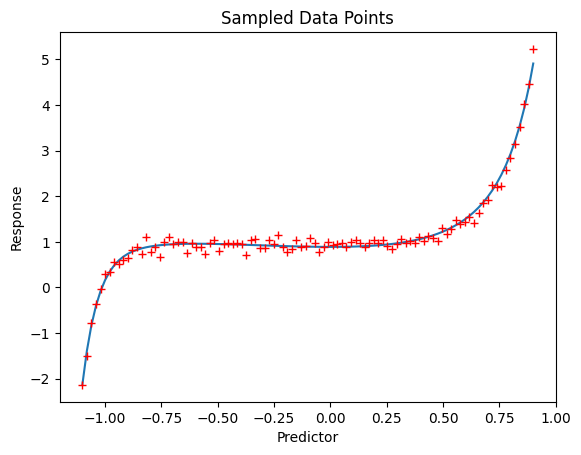

In [ ]:
#@title Plotting the  curve using coefficients obtained from best model (L1 regularization)
coeff_l1 = np.poly1d(best_model_l1.weights)
output = coeff_l1(predictor)
plt.plot(predictor, output)
plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [ ]:
best_model_l2 = PolynomialRegression(19)
best_model_l2.score(predictor, response)
lamda_values = [0.001, 0.01, 0.1, 1]
best_lamda  = 0.001
for i in lamda_values:

  model = PolynomialRegression(19)
  model.l2_fit(predictor, response, i)
  model.score(predictor, response)
  if(model.score_mse < best_model_l2.score_mse):
    best_model_l2 = model
    best_lamda = i

best_model_l2.degree, best_lamda, best_model_l2.score_mse

(19, 0.001, 0.0689633779455826)

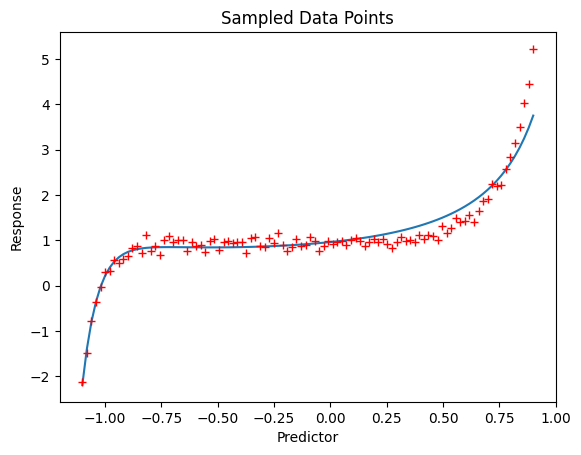

In [ ]:
#@title Plotting the  curve using coefficients obtained from best model (L2 regularization)
coeff_l2 = np.poly1d(best_model_l2.weights)
output = coeff_l2(predictor)
plt.plot(predictor, output)
plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

## Error metrics and Observations
Model | Error (MSE) | Best Lambda value
-------------------|------------------|-----------
Normal Fit       | 0.06781106117543154 | -
L1 Regularizaiton     | 0.011417803491981347 | 0.1
L2 Regularization  |   0.0689633779455826 | 0.001

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/SMAI/credit.csv') # pdf 86
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


# Experiment
We can simply use our polynomial regression, set the degree to be equal to 1, we then plan to check the coefficeint array and see which coefficeints dont matter/are insignificent.

In [ ]:
credit.describe

<bound method NDFrame.describe of       Income  Limit  Rating  Cards  Age  Education  Balance
0     14.891   3606     283      2   34         11      333
1    106.025   6645     483      3   82         15      903
2    104.593   7075     514      4   71         11      580
3    148.924   9504     681      3   36         11      964
4     55.882   4897     357      2   68         16      331
..       ...    ...     ...    ...  ...        ...      ...
395   12.096   4100     307      3   32         13      560
396   13.364   3838     296      5   65         17      480
397   57.872   4171     321      5   67         12      138
398   37.728   2525     192      1   44         13        0
399   18.701   5524     415      5   64          7      966

[400 rows x 7 columns]>

In [ ]:
from sklearn.preprocessing import StandardScaler
class MultipleLinearRegression:
    def __init__(self, input_dim, alpha=0.01, scale=1):
        self.w = [0] * input_dim
        self.alpha = alpha
        self.scaler = StandardScaler()
        self.scale = scale

    def fit(self, X, y, num_iter=25): # 25 since we dont have alot of features
        X_scaled = self.scaler.fit_transform(X)
        if self.scale == 0: X_scaled = X
        m = len(X_scaled)
        for i in range(num_iter):
            y_pred = np.dot(X_scaled, self.w)
            error = y_pred - y
            gradient = np.dot(X_scaled.T, error) * (1/m)
            self.w -= self.alpha * gradient

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        if self.scale == 0: X_scaled = X
        return np.dot(X_scaled, self.w)

    def predict_interaction(self, X, interaction):
      # 2 , 4 -> Rating, Age

      X_scaled = self.scaler.transform(X)
      if self.scale == 0: X_scaled = X
      return np.dot(X_scaled, self.w) + interaction


In [ ]:
from sklearn.model_selection import train_test_split
X = credit.drop('Balance', axis=1)
y = credit['Balance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 6), (80, 6), (320,), (80,))

In [ ]:
credit_model = MultipleLinearRegression(6)
credit_model.fit(X_train , y_train)
for x, y in zip(X.columns, credit_model.w):
  print(f"{x} coeff -> {y}")

Income coeff -> 38.13384056379639
Limit coeff -> 78.3662154698666
Rating coeff -> 78.43279028881274
Cards coeff -> 10.194167234654898
Age coeff -> -0.4595323548380972
Education coeff -> -1.579702865584169


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = credit_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}, RMSE per feature: {np.sqrt(mse)/6}")

MSE: 376376.3267272584, RMSE per feature: 102.24919542297664


The coefficients of education and age seem negligible in scale, even cards is somewhat small. These features may not be very relevant. We do observe however that the Income coefficient is significant while Limit and Rating hold the most regard.

**Note**: The `num_iter`  variable has been tested and adjusted for values `3, 5, 10, 25, 50` the ratio of these coefficeints remain (roughly) the same.

Lets test the model without scaling the features.

In [ ]:
credit_model_2 = MultipleLinearRegression(6, scale=0)
credit_model_2.fit(X_train , y_train, num_iter=3)
for x, y in zip(X.columns, credit_model_2.w):
  print(f"{x} coeff -> {y}")

Income coeff -> 27503739004140.562
Limit coeff -> 2739939037614030.5
Rating coeff -> 200940308602924.62
Cards coeff -> 1359761111997.2131
Age coeff -> 26530022143317.098
Education coeff -> 6217020529517.458


# Interaction Effects
Lets first start by testing what the effect of Rating and Age is on our prediction.

In [ ]:
coeff_1 = simpleRegression_coeff(credit['Rating'], credit['Balance'])
line_1 = coeff_1[0]*credit['Rating'] + coeff_1[1]

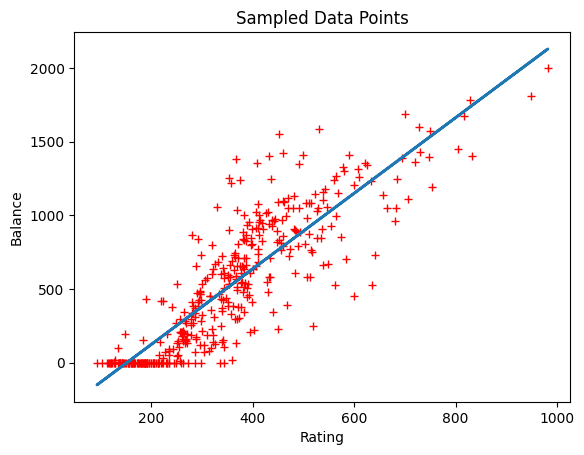

In [ ]:
#@title Plotting the line
plt.plot(credit['Rating'], credit['Balance'], 'r+')
plt.xlabel('Rating')
plt.ylabel('Balance')
plt.title('Sampled Data Points')
plt.plot(credit['Rating'], line_1, label='Regression Line', linewidth=2)
plt.show()

In [ ]:
coeff_2 = simpleRegression_coeff(credit['Age'], credit['Balance'])
line_2 = coeff_2[0]*credit['Age'] + coeff_2[1]

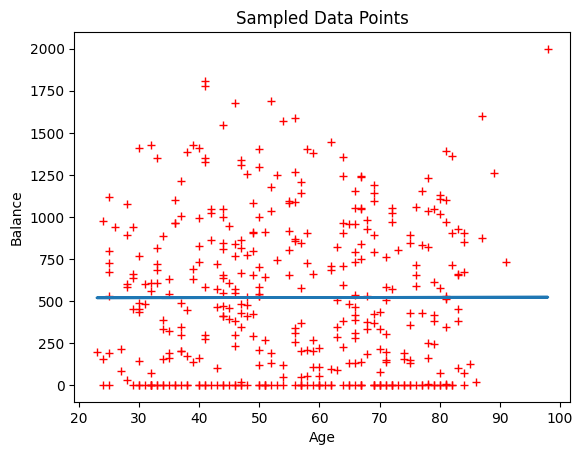

In [ ]:
#@title Plotting the line
plt.plot(credit['Age'], credit['Balance'], 'r+')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Sampled Data Points')
plt.plot(credit['Age'], line_2, label='Regression Line', linewidth=2)
plt.show()

In [ ]:
coeff_3 = simpleRegression_coeff(credit['Age']*credit['Rating'], credit['Balance'])
line_3 = coeff_3[0]*credit['Age']*credit['Rating'] + coeff_3[1]

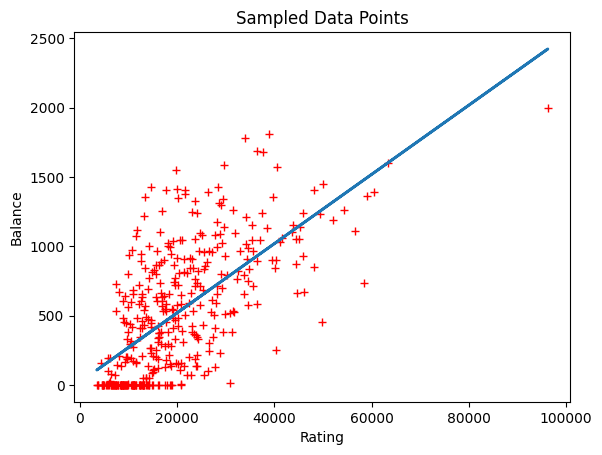

In [ ]:
#@title Plotting the line for interaction term (product of the two)
plt.plot(credit['Rating']*credit['Age'], credit['Balance'], 'r+')
plt.xlabel('Rating')
plt.ylabel('Balance')
plt.title('Sampled Data Points')
plt.plot(credit['Rating']*credit['Age'], line_3, label='Regression Line', linewidth=2)
plt.show()

Lets try adding this term to our model to get the interaction effect

In [ ]:
y_pred = credit_model.predict(X_test)
for i in range(len(X_test)):
  y_pred[i] += X_test.iloc[i]['Rating']*X_test.iloc[i]['Age']

y_pred_min = min(y_pred)
y_pred_max = max(y_pred)
y_pred_scaled = [(x - y_pred_min) / (y_pred_max - y_pred_min) for x in y_pred]

# inverse scaling to get back to the original scale
y_pred_original_scale = [x * (y_pred_max - y_pred_min) + y_pred_min for x in y_pred_scaled]

mse = mean_squared_error(y_test, y_pred_original_scale)
print(f"MSE: {mse}, RMSE per feature: {np.sqrt(mse)/6}")

MSE: 441389858.8564064, RMSE per feature: 3501.546717191983


### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [ ]:
sharks = pd.read_csv('/content/drive/MyDrive/SMAI/shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


In [ ]:
sharks.describe

<bound method NDFrame.describe of     Year  Month  SharkAttacks  Temperature  IceCreamSales
0   2008      1            25    11.900000             76
1   2008      2            28    15.200000             79
2   2008      3            32    17.200000             91
3   2008      4            35    18.500000             95
4   2008      5            38    19.400000            103
..   ...    ...           ...          ...            ...
79  2014      8            36    23.744268            101
80  2014      9            42    23.585229             78
81  2014     10            50    17.719383             94
82  2014     11            27    16.472557             72
83  2014     12            32    14.686391             68

[84 rows x 5 columns]>

In [ ]:
X = sharks.drop('SharkAttacks', axis=1)
y = sharks['SharkAttacks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67, 4), (17, 4), (67,), (17,))

In [ ]:
shark_model = MultipleLinearRegression(4)
shark_model.fit(X_train , y_train)
for x, y in zip(X.columns, shark_model.w):
  print(f"{x} coeff -> {y}")

Year coeff -> -0.11418976241339836
Month coeff -> 1.019150373398705
Temperature coeff -> 2.0932290820291417
IceCreamSales coeff -> 1.3686759923925809


In [ ]:
y_pred = shark_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}, RMSE per feature: {np.sqrt(mse)/4}")

MSE: 1087.29827664564, RMSE per feature: 8.243551558057517


Due to the small size of the dataset, the MSE is quite high, and observations made are very unreliable. Regardless the Icecreamsales coeff seem to have less signifiance, the temprature matters most. The significance of Year seems to be almost 0. Lets try dropping IceCreamSales and see if our peformance is better, we will alos try dropping the Year coeff.

In [ ]:
X = sharks.drop('SharkAttacks', axis=1)
y = sharks['SharkAttacks']
X = X.drop('IceCreamSales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67, 3), (17, 3), (67,), (17,))

In [ ]:
shark_model = MultipleLinearRegression(3)
shark_model.fit(X_train , y_train)
for x, y in zip(X.columns, shark_model.w):
  print(f"{x} coeff -> {y}")

Year coeff -> -0.13140109029951053
Month coeff -> 0.9422799358931154
Temperature coeff -> 2.270879218585337


In [ ]:
y_pred = shark_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}, RMSE per feature: {np.sqrt(mse)/3}")

MSE: 1071.4031777040848, RMSE per feature: 10.910765212517227


The RMSE seems to have gone slightly higher, but the coefficients havent changed alot still. lets try dropping Year now.

In [ ]:
X = sharks.drop('SharkAttacks', axis=1)
y = sharks['SharkAttacks']
X = X.drop('Year', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67, 3), (17, 3), (67,), (17,))

In [ ]:
shark_model = MultipleLinearRegression(3)
shark_model.fit(X_train , y_train)
for x, y in zip(X.columns, shark_model.w):
  print(f"{x} coeff -> {y}")

Month coeff -> 1.0197648697786972
Temperature coeff -> 2.0947593916579477
IceCreamSales coeff -> 1.370242352411102


In [ ]:
y_pred = shark_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}, RMSE per feature: {np.sqrt(mse)/3}")

MSE: 1088.6511458835064, RMSE per feature: 10.998237969397676


The RMSE  has remained the same almost. but the ice cream sales coefficient has gone up slightly. The temperature coefficient still seems to matter the most, which makes sense (atleast intuitively)

**Note**: I have not used L1/L2 regularization as most of the coefficients here hold almost similliar weightage, some may be very negligible but at max theres 4 features anyway.